In [70]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt

In [59]:
steph_curry_raw = pd.read_csv('/Users/brendan/Desktop/Python/NBA_API/Steph_Curry.csv')
steph_curry_raw['DATE'] = pd.to_datetime(steph_curry_raw['DATE']).dt.date
steph_curry_raw.dropna(subset=['Season'], inplace=True)
steph_curry_raw['Season'] = steph_curry_raw['Season'].astype(int)

NBA_all_raw = pd.read_csv('/Users/brendan/Desktop/Python/NBA_API/NBA_all_2000.csv')
NBA_all_raw['DATE'] = pd.to_datetime(NBA_all_raw['DATE']).dt.date
NBA_all_raw.dropna(subset=['Season'], inplace=True)
NBA_all_raw['Season'] = NBA_all_raw['Season'].astype(int)


In [60]:
steph_curry_raw.isna().sum()

DATE                    0
AGE                     0
TEAM                    0
HOME/AWAY               0
OPPONENT                0
RESULT                  0
GS                      0
MP                      0
FG                      0
FGA                     0
FG%                     0
3P                      0
3PA                     0
3P%                     2
FT                      0
FTA                     0
FT%                    90
ORB                     0
DRB                     0
TRB                     0
AST                     0
STL                     0
BLK                     0
TOV                     0
PF                      0
PTS                     0
GAME_SCORE              0
+/-                     0
Player                  0
Years                   0
Days                    0
Season                  0
rank_FG                 0
quantile_FG             0
rank_FGA                0
quantile_FGA            0
rank_3P                 0
quantile_3P             0
rank_3PA    

In [61]:
NBA_all_raw.columns

Index(['DATE', 'AGE', 'TEAM', 'HOME/AWAY', 'OPPONENT', 'RESULT', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GAME_SCORE',
       '+/-', 'Player', 'Years', 'Days', 'Season', 'rank_FG', 'quantile_FG',
       'rank_FGA', 'quantile_FGA', 'rank_3P', 'quantile_3P', 'rank_3PA',
       'quantile_3PA', 'rank_FT', 'quantile_FT', 'rank_FTA', 'quantile_FTA',
       'rank_ORB', 'quantile_ORB', 'rank_DRB', 'quantile_DRB', 'rank_TRB',
       'quantile_TRB', 'rank_AST', 'quantile_AST', 'rank_STL', 'quantile_STL',
       'rank_BLK', 'quantile_BLK', 'rank_PTS', 'quantile_PTS',
       'rank_GAME_SCORE', 'quantile_GAME_SCORE'],
      dtype='object')

In [62]:
steph_curry = steph_curry_raw[['DATE', 'Player', 'Season','TEAM', 'OPPONENT', 'RESULT', 'MP', 'FG', 'FGA', 'FG%',
                              '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK',
                              'TOV', 'PF', 'PTS', 'GAME_SCORE', '+/-']]
NBA_all = NBA_all_raw[['DATE', 'Player', 'Season','TEAM', 'OPPONENT', 'RESULT', 'MP', 'FG', 'FGA', 'FG%',
                              '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK',
                              'TOV', 'PF', 'PTS', 'GAME_SCORE', '+/-']]

In [63]:
steph_curry.head()

,DATE,Player,Season,TEAM,OPPONENT,RESULT,MP,FG,FGA,FG%,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,2009-10-28,Stephen Curry,2010,GSW,HOU,L (-1),35:39,7,12,0.583,...,NaN,2,7,4,0,2,2,14,15.5,7
1,2009-10-30,Stephen Curry,2010,GSW,PHO,L (-22),39:05,5,9,0.556,...,NaN,2,4,1,0,3,5,12,7.1,-19
2,2009-11-04,Stephen Curry,2010,GSW,MEM,W (+8),28:27,3,6,0.500,...,NaN,5,9,2,0,1,4,7,11.2,-4
3,2009-11-06,Stephen Curry,2010,GSW,LAC,L (-28),21:32,1,5,0.200,...,0.75,1,3,0,0,0,6,5,1.5,-13
4,2009-11-08,Stephen Curry,2010,GSW,SAC,L (-13),31:15,4,8,0.500,...,0.00,4,6,0,0,5,4,9,3.4,-5


In [71]:
steph_3pt_season = steph_curry.groupby('Season')[['3P', '3PA', '3P%']].mean().round(2)

In [72]:
NBA_3pt_season = NBA_all.groupby('Season')[['3P', '3PA', '3P%']].mean().round(2)

In [74]:
## Plotting time
NBA_all_raw.isna().sum()

DATE                       0
AGE                        0
TEAM                       0
HOME/AWAY                  0
OPPONENT                   0
RESULT                     0
GS                         0
MP                         0
FG                         0
FGA                        0
FG%                      841
3P                         0
3PA                        0
3P%                    70538
FT                         0
FTA                        0
FT%                    55658
ORB                        0
DRB                        0
TRB                        0
AST                        0
STL                        0
BLK                        0
TOV                        0
PF                         0
PTS                        0
GAME_SCORE                 0
+/-                        0
Player                     0
Years                      0
Days                       0
Season                     0
rank_FG                    0
quantile_FG                0
rank_FGA      

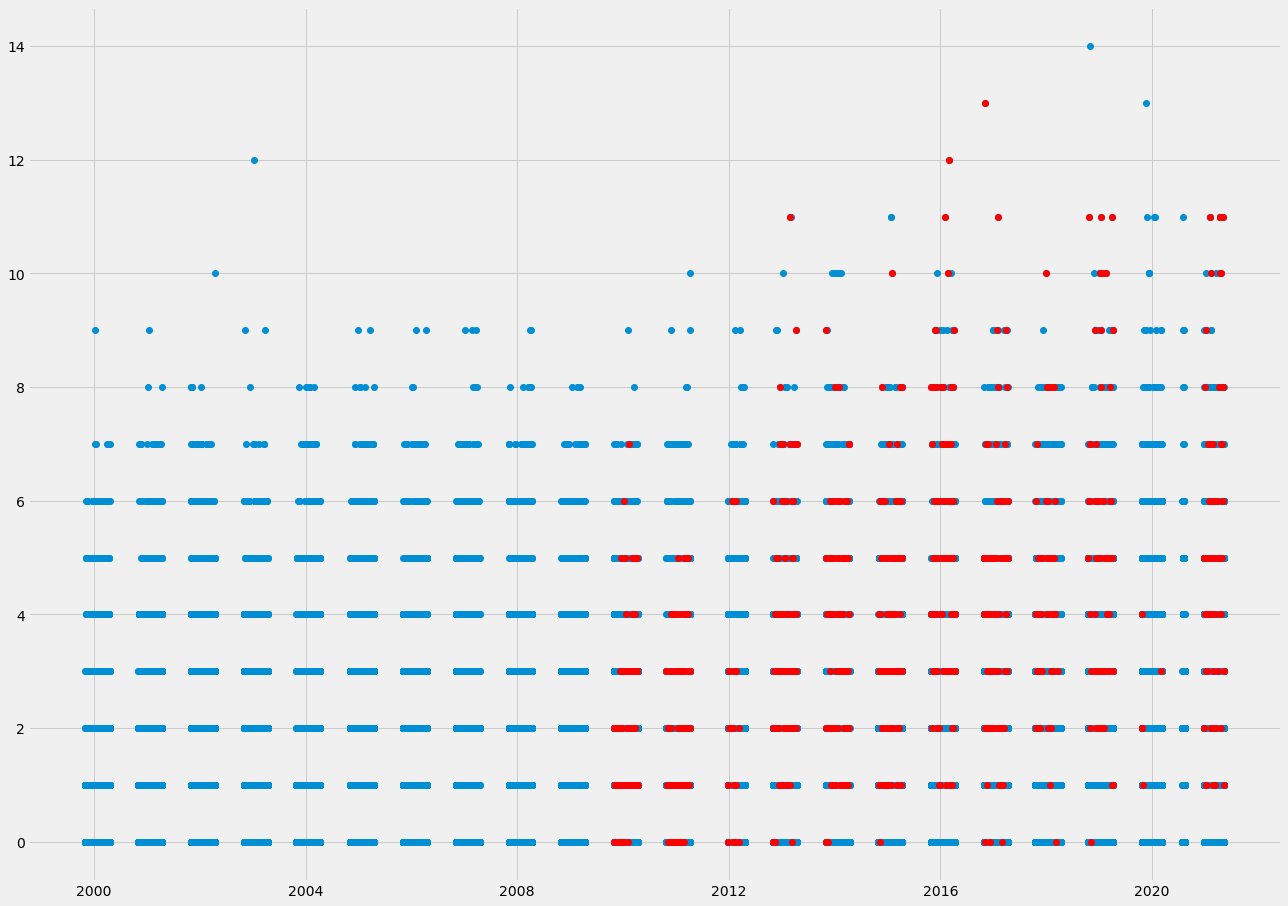

In [80]:
fig, ax = plt.subplots(figsize=(20,15))
x = NBA_all_raw['DATE']
y = NBA_all_raw['3P']
x1 = steph_curry_raw['DATE']
y1 = steph_curry_raw['3P']
plt.plot_date(x, y)
plt.plot_date(x1,y1,c='red')

plt.show()